In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy import stats
import statistics
from scipy.stats import f, norm, t, chi2

#for power analysis
import statsmodels
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind


#Important to note, we are specifying that the population does not have equal variance passing along False for the equal_var parameter. We know this because both samples were taken from populations with different standard deviations. Normally you wouldn’t know this is true and would have to run a Levene Test for Equal Variances.

In [40]:
random.seed(20) #for results to be recreated
N = 500 #number of samples to take from each population
a = [random.gauss(55,20) for x in range(N)] #take N samples from population A
b = [random.gauss(45,15) for x in range(N)] #take N samples from population B

print(statistics.stdev(a))
print(statistics.stdev(b))

19.80442678888617
15.660129573824495


# run an independent - insignificant test 

The results of the independent t-test are: 
	t-value = 1.43
	p-value = 15.43%


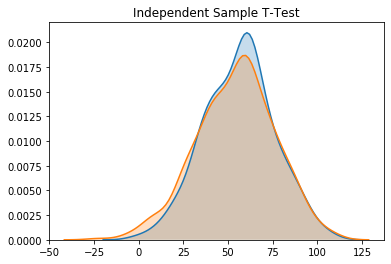

In [5]:
random.seed(20) #for results to be recreated
N = 500 #number of samples to take from each population
a = [random.gauss(55,20) for x in range(N)] #take N samples from population A
b = [random.gauss(55,21) for x in range(N)] #take N samples from population B

sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

tStat, pValue = ttest_ind(a, b, equal_var = False)
#print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #this is working don't need it
print('The results of the independent t-test are: \n\tt-value = {:4.2f}\n\tp-value = {:4.2%}'.format(tStat,pValue))


# getting critiical values without looking up in the table 

In [85]:
df1 = 1500

q1 = (1 + 0.95) / 2 #two tailed

rejection_reg = t.ppf(q=q1, df=df1)
      
print('Crit. Value: {:.2f}'.format(rejection_reg))

Crit. Value: 1.96


In [86]:
df1 = 15

q1 = (1 + 0.95) / 2 #two tailed

rejection_reg = t.ppf(q=q1, df=df1)
      
print('Crit. Value: {:.2f}'.format(rejection_reg))

Crit. Value: 2.13


# run a independent - significant test

The results of the independent t-test are: 
	t-value = 5.94
	p-value = 0.00%


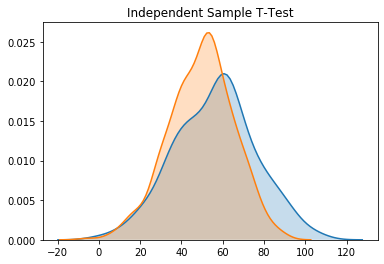

In [47]:
random.seed(20) #for results to be recreated
N = 500 #number of samples to take from each population
a = [random.gauss(55,20) for x in range(N)] #take N samples from population A
b = [random.gauss(50,15) for x in range(N)] #take N samples from population B

sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

tStat, pValue = ttest_ind(a, b, equal_var = False)
#print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))
print('The results of the independent t-test are: \n\tt-value = {:4.2f}\n\tp-value = {:4.2%}'.format(tStat,pValue))


# run a pairwise - significant test

The results of the independent t-test are: 
	t-value = -8.88
	p-value = 0.00%


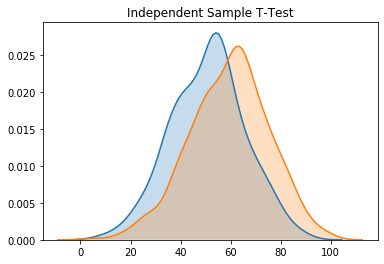

In [50]:
random.seed(20) #for results to be recreated
N = 500 #number of samples to take from each population
a = [random.gauss(50,15) for x in range(N)] #take N samples from population A at time T
b = [random.gauss(60,15) for x in range(N)] #take N samples from population A at time T+x

sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

tStat, pValue =  ttest_rel(a, b)

print('The results of the independent t-test are: \n\tt-value = {:4.2f}\n\tp-value = {:4.2%}'.format(tStat,pValue))

# run a pariwise - insignificant test

The results of the independent t-test are: 
	t-value = 1.41
	p-value = 15.79%


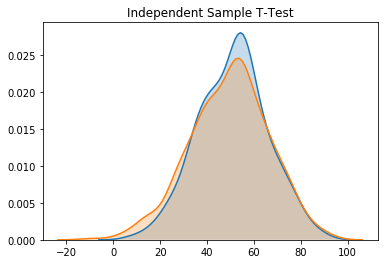

In [61]:
random.seed(20) #for results to be recreated
N = 500 #number of samples to take from each population
a = [random.gauss(50,15) for x in range(N)] #take N samples from population A at time T
b = [random.gauss(50,16) for x in range(N)] #take N samples from population A at time T+x

sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Independent Sample T-Test")

tStat, pValue =  ttest_rel(a, b)

print('The results of the independent t-test are: \n\tt-value = {:4.2f}\n\tp-value = {:4.2%}'.format(tStat,pValue))

# anova - significant - anova is one tailed only

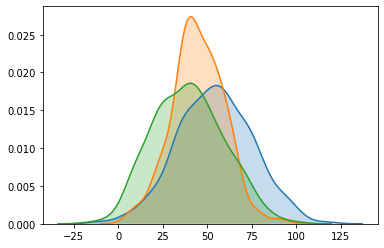

20.95712919001166
14.734940079917346
19.897083592035084
p-value for significance is: = 0.00%
reject null hypothesis
79.78756724319982


In [75]:
random.seed(50) #for results to be recreated
N = 500 #number of samples to take from each population
a = [random.gauss(55,20) for x in range(N)] #take N samples from population A
b = [random.gauss(45,15) for x in range(N)] #take N samples from population B
c = [random.gauss(40,20) for x in range(N)] #take N samples from population B


sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
sns.kdeplot(c, shade=True)
plt.show()


print(statistics.stdev(a))
print(statistics.stdev(b))
print(statistics.stdev(c))



F, p = stats.f_oneway(a, b, c)

print("p-value for significance is: = {:4.2%}".format(p))
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
print(F)

In [80]:
dfn1 = 2
dfd1 = 1497

rejection_reg = f.ppf(q=.95, dfn=dfn1, dfd=dfd1)
      
      
print('Crit. Value: {:.2f}'.format(rejection_reg))

Crit. Value: 3.00


# anova - insignificant 

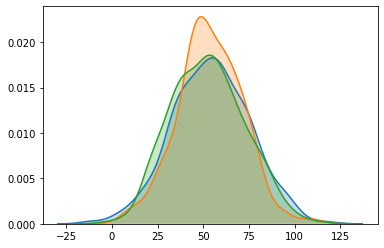

20.95712919001166
17.681928095900812
19.897083592035084
p-value for significance is: = 33.02%
accept null hypothesis
1.1088786985674017


In [67]:
random.seed(50) #for results to be recreated
N = 500 #number of samples to take from each population
a = [random.gauss(55,20) for x in range(N)] #take N samples from population A
b = [random.gauss(54,18) for x in range(N)] #take N samples from population B
c = [random.gauss(53,20) for x in range(N)] #take N samples from population B


sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
sns.kdeplot(c, shade=True)
plt.show()


print(statistics.stdev(a))
print(statistics.stdev(b))
print(statistics.stdev(c))



F, p = stats.f_oneway(a, b, c)

print("p-value for significance is: = {:4.2%}".format(p))
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")
    
print(F)

# f dist with full curve 

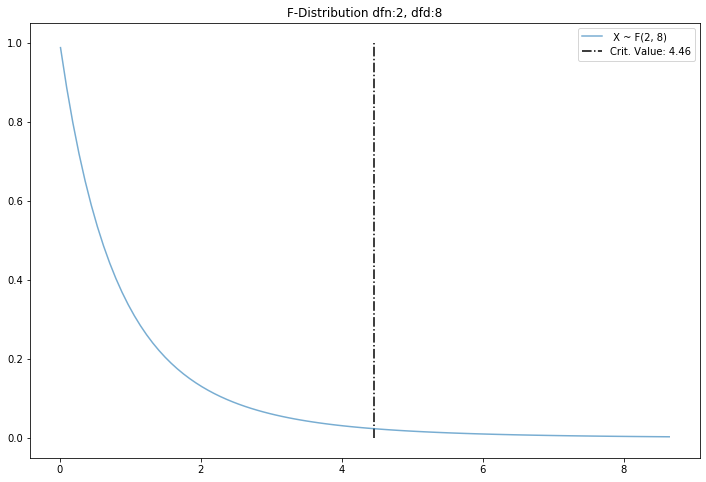

In [77]:
# F-distribution parameters full worked example - something tidier above 


'''

dfn = k - 1 
dfd = N - k 

k is the number of comparison groups
N is the total number of observations in the analysis
'''

dfn1 = 2
dfd1 = 1497

from scipy.stats import f, norm
def plot_f_distrubiton():
    # Set figure 
    plt.figure(figsize=(12, 8))
    
    # Set degrees of freedom
    dfn = dfn1
    dfd = dfd1
    rejection_reg = f.ppf(q=.95, dfn=dfn, dfd=dfd)
    mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')
    
    x = np.linspace(f.ppf(0.01, dfn, dfd), 
                    f.ppf(0.99, dfn, dfd), 100)
    
    # Plot values
    plt.plot(x, f.pdf(x, dfn, dfd), alpha=0.6, 
             label=' X ~ F({}, {})'.format(dfn, dfd))
    plt.vlines(rejection_reg, 0.0, 1.0, 
               linestyles="dashdot", label="Crit. Value: {:.2f}".format(rejection_reg))
    plt.legend()
    plt.title('F-Distribution dfn:{}, dfd:{}'.format(dfn, dfd))
plot_f_distrubiton();


# chi squared - think a better example 

In [240]:
#reworked example of https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.seed.html
#straight to stats package
np.random.seed(10)

voter_type = np.random.choice(a=["a","b","c","d","e"],
                              p=[0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_party = np.random.choice(a=["democrat","independent","republican"],
                              p=[0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"type":voter_type, 
                       "party":voter_party})


# Create a CrossTab from DataFrame, Assign the column names and row names
voter_tab = pd.crosstab(voters.type, voters.party, margins=True)
voter_tab.columns = ["democrat", "independent", "republican", "row_totals"]
voter_tab.index = ["a","b","c","d","e", "col_totals"]
# You can check the data of CrossTab by calling it
display(voter_tab)

observed = voter_tab.iloc[0:5, 0:3]
# this just removes the totals because we dont want them for chi2
#display(observed)


chi2_stat, p_val, dof, ex = stats.chi2_contingency(observed=observed)
#getting the crtical value at 95% for the above
crit = chi2.ppf(q=0.95, df=dof)



print("===Chi2 Stat===") 
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===") #rows -1 cols -1 
print(dof)
print("\n")
print("===P-Value===")
print('{:4.2%}'.format(p_val))
print(p_val)
print("\n")
print("===Critical-Value===") 
print(crit)
print("\n")
print("===Independent  or Not===") 
print(np.where(crit>chi2_stat,'Is Independent ','Not Independent'))
print("\n")
print("===Contingency Table===") #this is against 
print(ex)



,democrat,independent,republican,row_totals
a,21,7,32,60
b,65,25,64,154
c,107,50,94,251
d,15,8,15,38
e,189,96,212,497
col_totals,397,186,417,1000


===Chi2 Stat===
7.169321280162059


===Degrees of Freedom===
8


===P-Value===
51.85%
0.518479392948842


===Critical-Value===
15.50731305586545


===Independent  or Not===
Is Independent 


===Contingency Table===
[[ 23.82   11.16   25.02 ]
 [ 61.138  28.644  64.218]
 [ 99.647  46.686 104.667]
 [ 15.086   7.068  15.846]
 [197.309  92.442 207.249]]


# chi squared which shouldn't be indepedent

In [241]:
np.random.seed()

voter_type = np.random.choice(a=["a","b","c","d","e"],
                              p=[0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_party = np.random.choice(a=["democrat","independent","republican"],
                              p=[0.4, 0.2, 0.4],
                              size=1000)

voters = pd.DataFrame({"type":voter_type, 
                       "party":voter_party})

voters['party'] = np.where(voters['type']=='d','independent',voters['party']) 



# Create a CrossTab from DataFrame, Assign the column names and row names
voter_tab = pd.crosstab(voters.type, voters.party, margins=True)
voter_tab.columns = ["democrat", "independent", "republican", "row_totals"]
voter_tab.index = ["a","b","c","d","e", "col_totals"]
# You can check the data of CrossTab by calling it
display(voter_tab)

observed = voter_tab.iloc[0:5, 0:3]
# this just removes the totals because we dont want them for chi2
#display(observed)


chi2_stat, p_val, dof, ex = stats.chi2_contingency(observed=observed)
#getting the crtical value at 95% for the above
crit = chi2.ppf(q=0.95, df=dof)



print("===Chi2 Stat===") 
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===") #rows -1 cols -1 
print(dof)
print("\n")
print("===P-Value===")
print('{:4.2%}'.format(p_val))
print(p_val)
print("\n")
print("===Critical-Value===") 
print(crit)
print("\n")
print("===Independent  or Not===") 
print(np.where(crit>chi2_stat,'Is Independent ','Not Independent'))
print("\n")
print("===Contingency Table===") #this is against 
print(ex)

,democrat,independent,republican,row_totals
a,16,11,23,50
b,61,30,52,143
c,115,43,105,263
d,0,50,0,50
e,193,107,194,494
col_totals,385,241,374,1000


===Chi2 Stat===
170.95196851285934


===Degrees of Freedom===
8


===P-Value===
0.00%
8.146339913729484e-33


===Critical-Value===
15.50731305586545


===Independent  or Not===
Not Independent


===Contingency Table===
[[ 19.25   12.05   18.7  ]
 [ 55.055  34.463  53.482]
 [101.255  63.383  98.362]
 [ 19.25   12.05   18.7  ]
 [190.19  119.054 184.756]]


# shurnk sample - chi isn't effective on small samples

In [242]:
np.random.seed()

voter_type = np.random.choice(a=["a","b","c"],
                              size=10)

voter_party = np.random.choice(a=["democrat","independent"],
                              size=10)

voters = pd.DataFrame({"type":voter_type, 
                       "party":voter_party})

#voters['party'] = np.where(voters['type']=='d','independent',voters['party']) 



# Create a CrossTab from DataFrame, Assign the column names and row names
voter_tab = pd.crosstab(voters.type, voters.party, margins=True)
voter_tab.columns = ["democrat", "independent", "row_totals"]
voter_tab.index = ["a","b","c", "col_totals"]
# You can check the data of CrossTab by calling it
display(voter_tab)

observed = voter_tab.iloc[0:5, 0:3]
# this just removes the totals because we dont want them for chi2
#display(observed)


chi2_stat, p_val, dof, ex = stats.chi2_contingency(observed=observed)
#getting the crtical value at 95% for the above
crit = chi2.ppf(q=0.95, df=dof)



print("===Chi2 Stat===") 
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===") #rows -1 cols -1 
print(dof)
print("\n")
print("===P-Value===")
print('{:4.2%}'.format(p_val))
print(p_val)
print("\n")
print("===Critical-Value===") 
print(crit)
print("\n")
print("===Independent  or Not===") 
print(np.where(crit>chi2_stat,'Is Independent ','Not Independent'))
print("\n")
print("===Contingency Table===") #this is against 
print(ex)

,democrat,independent,row_totals
a,3,1,4
b,0,1,1
c,2,3,5
col_totals,5,5,10


===Chi2 Stat===
2.2


===Degrees of Freedom===
6


===P-Value===
90.04%
0.9004162814033052


===Critical-Value===
12.591587243743977


===Independent  or Not===
Is Independent 


===Contingency Table===
[[ 2.   2.   4. ]
 [ 0.5  0.5  1. ]
 [ 2.5  2.5  5. ]
 [ 5.   5.  10. ]]


# power analysis 

In [ ]:
#https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26


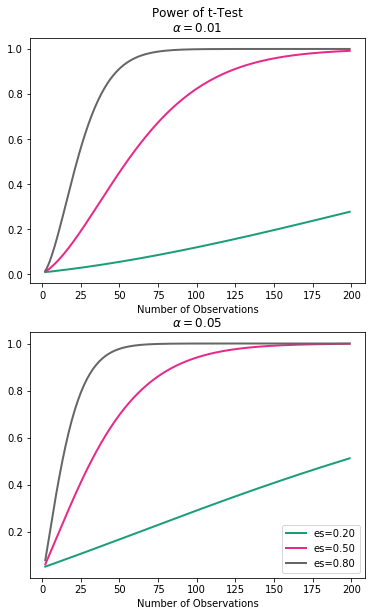

In [11]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 2)

In [27]:
#https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/

effect1 = 0.8 #it is standard to aim for this, note this can be above 1
alpha1 = 0.05 #significance level 
power1 = 0.8 # this is pretty standard
ratio1 = 1
'''1 #equal sample splits
0.5 #equal 2nd sample is half the size 
0.1 #2nd sample at 10% '''


# perform power analysis
result = TTestIndPower().solve_power(effect1, power=power1, nobs1=None, ratio=ratio1, alpha=alpha1)
print('Sample Size: %.3f' % result)

Sample Size: 25.525


In [30]:
#one of the below must be set to None
effect1 = 0.8 #it is standard to aim for this, note this can be above 1
alpha1 = 0.05 #significance level 
power1 = 0.8 # this is pretty standard
ratio1 = None
nobs1a = 1000 # nobs2 = nobs1 * ratio - this is within the function 
'''1 #equal sample splits
0.5 #equal 2nd sample is half the size 
0.1 #2nd sample at 10% '''


# perform power analysis
a= TTestIndPower().solve_power(effect1, power=power1, nobs1=nobs1a, ratio=ratio1, alpha=alpha1)
#so in this example to get a large effect we would be looking at 1.2% control
print(a)
print(a*nobs1a)

0.012440915817945892
12.440915817945893


In [31]:
#one of the below must be set to None
effect1 = 0.2 #what if we only get a small effect
alpha1 = 0.05 #significance level 
power1 = 0.8 # this is pretty standard
ratio1 = None
nobs1a = 1000 # nobs2 = nobs1 * ratio - this is within the function 
'''1 #equal sample splits
0.5 #equal 2nd sample is half the size 
0.1 #2nd sample at 10% '''


# perform power analysis
a= TTestIndPower().solve_power(effect1, power=power1, nobs1=nobs1a, ratio=ratio1, alpha=alpha1)
#so in this example to get a large effect we would be looking at 1.2% control
print(a)
print(a*nobs1a)

0.2445956581411707
244.5956581411707


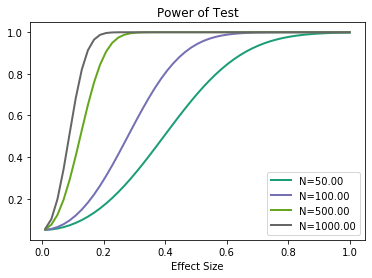

In [56]:
#so I can't see a clear was to feed in the ratio, however I assume that if you use the control *2 as the sample size you will have your answer


#with more sample power rises very fast
#because the example is very strong you don't need a big effect to get to a high power with the larger sample 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig = TTestIndPower().plot_power(dep_var='effect_size',
                                 nobs= [50,100,500,1000],
                                 effect_size=np.linspace(0.01, 1, 51),#effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,                                
                                 ax=ax)#, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')

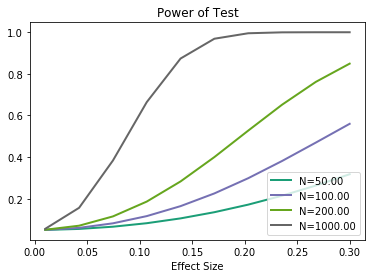

In [60]:
#however say our effect size is really poor 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig = TTestIndPower().plot_power(dep_var='effect_size',
                                 nobs= [50,100,200,1000],
                                 effect_size=np.linspace(0.01, 0.3, 10),#effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,                                
                                 ax=ax)#, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')

In [58]:
#the below example would have churned out .29 effect, look at the 200 line above 
effect1 = None
alpha1 = 0.05 #significance level 
power1 = 0.8 # this is pretty standard
ratio1 = 0.10 #10%
nobs1a = 1000 # nobs2 = nobs1 * ratio - this is within the function 
'''1 #equal sample splits
0.5 #equal 2nd sample is half the size 
0.1 #2nd sample at 10% '''


# perform power analysis
TTestIndPower().solve_power(effect1, power=power1, nobs1=nobs1a, ratio=ratio1, alpha=alpha1)

0.29408951487520685

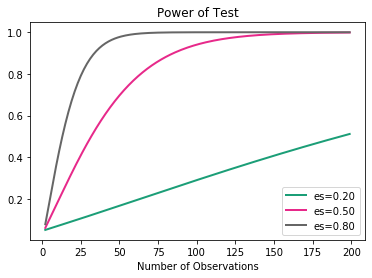

In [54]:
#so big effect power climbs quickly 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,                                
                                 ax=ax)#, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')

In [29]:
#one of the below must be set to None
effect1 = 0.8 #it is standard to aim for this, note this can be above 1
alpha1 = 0.05 #significance level 
power1 = 0.8 # this is pretty standard
ratio1 = 0.12
nobs1a = None # nobs2 = nobs1 * ratio - this is within the function 
'''1 #equal sample splits
0.5 #equal 2nd sample is half the size 
0.1 #2nd sample at 10% '''


# perform power analysis
TTestIndPower().solve_power(effect1, power=power1, nobs1=nobs1a, ratio=ratio1, alpha=alpha1)

116.20261216287562

In [21]:
#one of the below must be set to None
effect1 = 0.8 #it is standard to aim for this, note this can be above 1
alpha1 = 0.05 #significance level 
power1 = 0.8 # this is pretty standard
ratio1 = None
nobs1a = 137 # nobs2 = nobs1 * ratio - this is within the function 
'''1 #equal sample splits
0.5 #equal 2nd sample is half the size 
0.1 #2nd sample at 10% '''


# perform power analysis
TTestIndPower().solve_power(effect1, power=power1, nobs1=nobs1a, ratio=ratio1, alpha=alpha1)

0.0997324637401498

In [26]:
#one of the below must be set to None
effect1 = 0.8 #it is standard to aim for this, note this can be above 1
alpha1 = 0.05 #significance level 
power1 = 0.8 # this is pretty standard
ratio1 = None
nobs1a = 136 # nobs2 = nobs1 * ratio - this is within the function 
'''1 #equal sample splits
0.5 #equal 2nd sample is half the size 
0.1 #2nd sample at 10% '''


# perform power analysis
TTestIndPower().solve_power(effect1, power=power1, nobs1=nobs1a, ratio=ratio1, alpha=alpha1)

0.1005496071676023